In [4]:
# import libraries
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
# PART A: function to plot histogram
def CV_HIST(img):
    # define image height and width
    height = img.shape[0]
    width = img.shape[1]

    # define 3 histograms for RGB values
    histogram_r = [0] * 256
    histogram_g = [0] * 256
    histogram_b = [0] * 256

    # iterate through each pixel and add values to histograms
    for y in range(height):
            for x in range(width):
                r, g, b = img[y][x]
                histogram_r[r] += 1
                histogram_g[g] += 1
                histogram_b[b] += 1

    return histogram_r, histogram_g, histogram_b

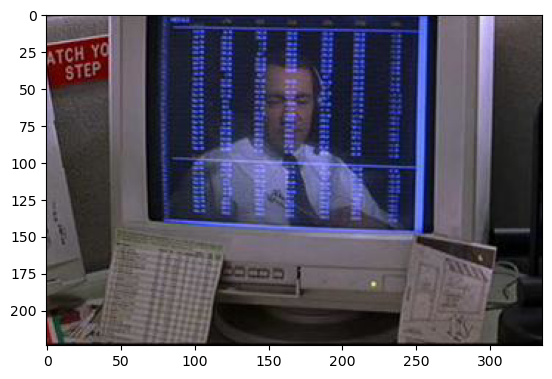

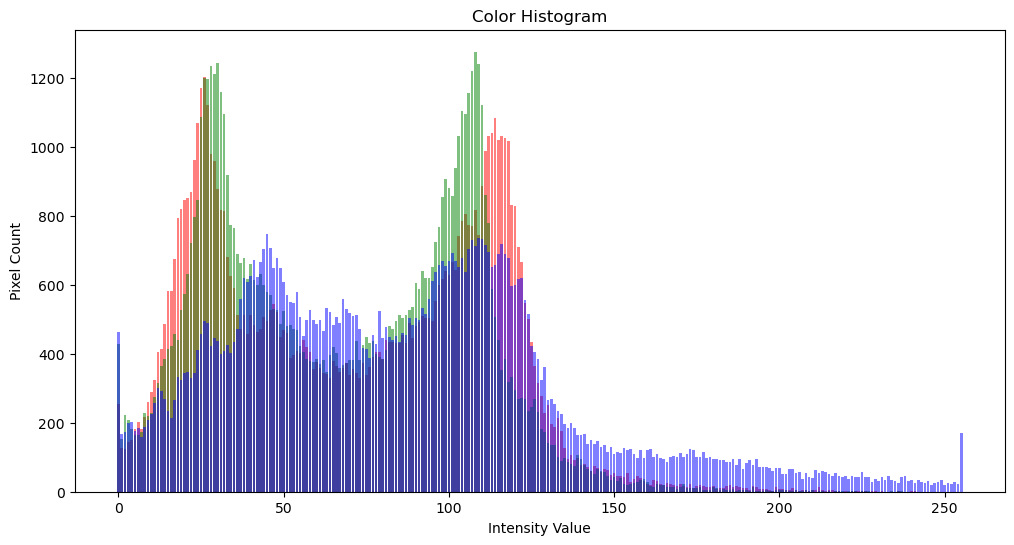

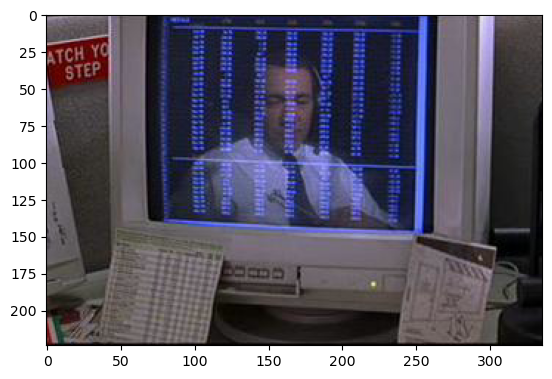

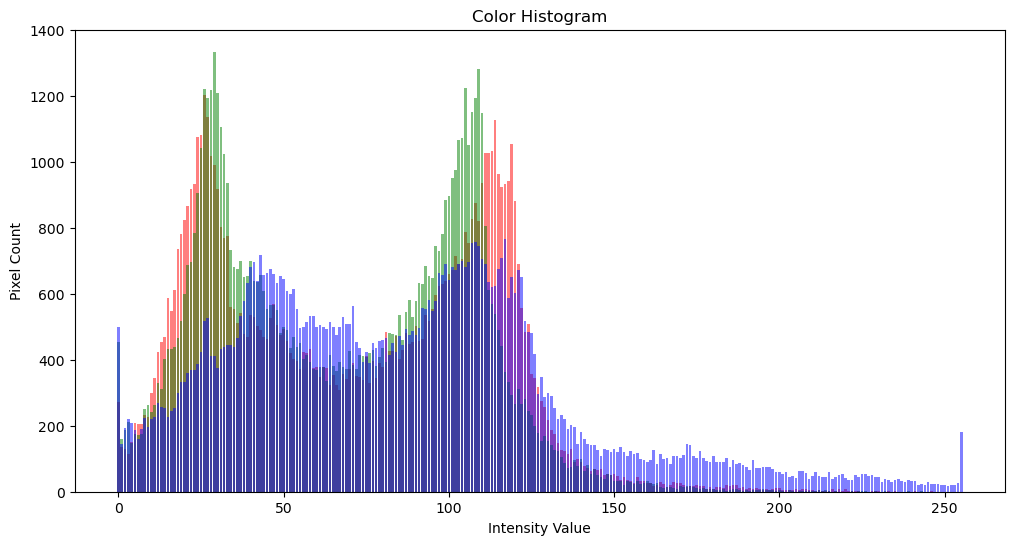

In [6]:
import random

# open video file
video = cv2.VideoCapture('DatasetB.avi')

# extract frames
frame_num = 0

# calculate number of frames
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# show two random non-consecutive frames for report
random_frames = [random.randint(0, total_frames-1) for _ in range(2)]
i = random_frames[0]
j = random_frames[1]

# loop through video
while video.isOpened() and frame_num < total_frames:
    ret, frame = video.read()
    if not ret:
        break

    # convert frames to rgb
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # calculate histograms
    histogram_r, histogram_g, histogram_b = CV_HIST(frame)

    if frame_num == i or frame_num == j:
        plt.imshow(frame)
        # plot histogram of each frame
        intensity_values = np.arange(256)
        plt.figure(figsize=(12, 6))
        plt.bar(intensity_values, histogram_r, color='red', alpha=0.5, label='Red Channel')
        plt.bar(intensity_values, histogram_g, color='green', alpha=0.5, label='Green Channel')
        plt.bar(intensity_values, histogram_b, color='blue', alpha=0.5, label='Blue Channel')
        plt.title("Color Histogram")
        plt.xlabel("Intensity Value")
        plt.ylabel("Pixel Count")
        plt.show()

    frame_num += 1

# release video object
video.release()
cv2.destroyAllWindows()

In [7]:
# PART B: Function to calculate histogram intersection between two histograms
def ICV_HIST_INTERSECTION(hist1, hist2):
    # Calculate the intersection for each color channel by summing the minimum values at each bin
    intersection_r = sum(min(hist1[0][i], hist2[0][i]) for i in range(256))
    intersection_g = sum(min(hist1[1][i], hist2[1][i]) for i in range(256))
    intersection_b = sum(min(hist1[2][i], hist2[2][i]) for i in range(256))
    
    # return total intersection
    return intersection_r + intersection_g + intersection_b

218768


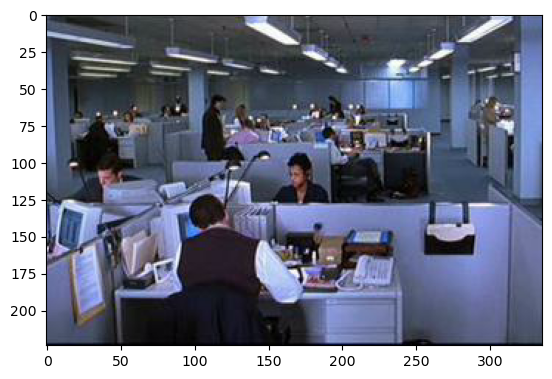

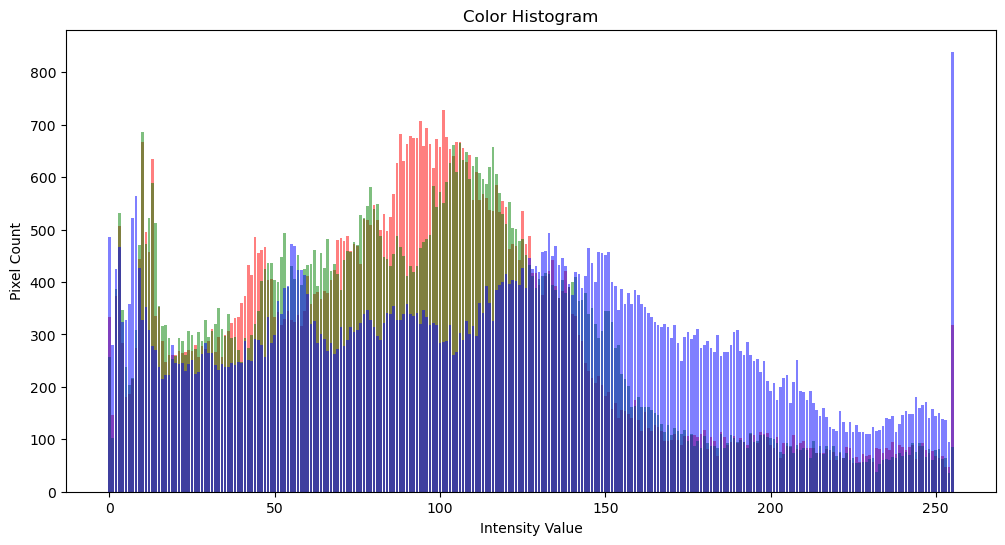

218908


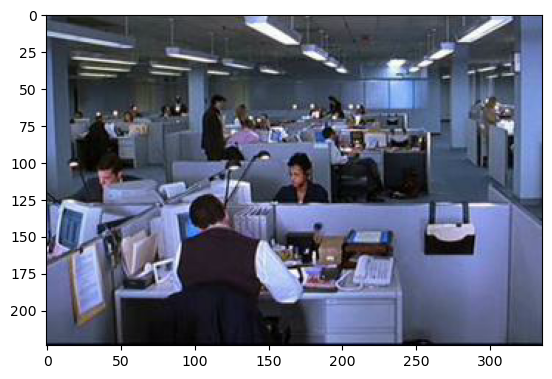

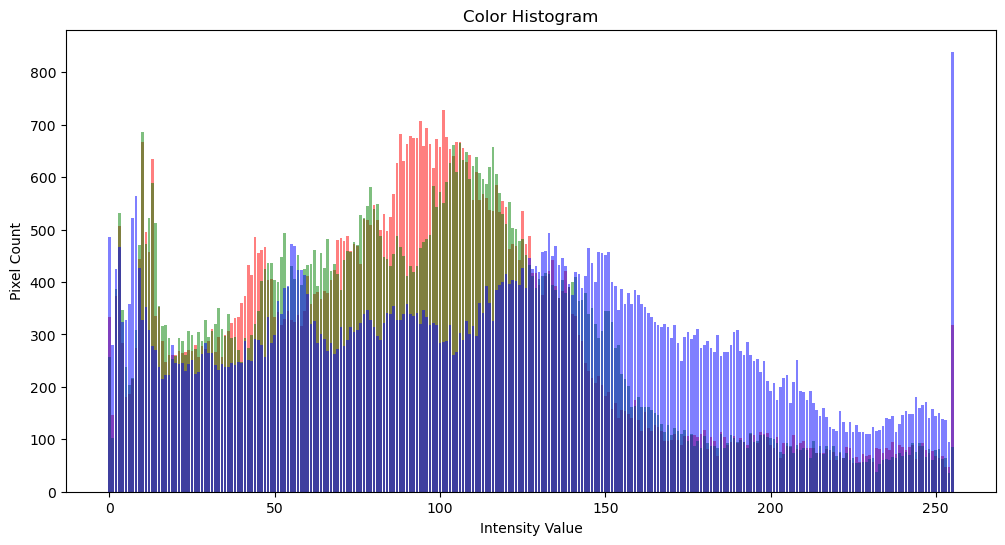

In [8]:
# open video file
video = cv2.VideoCapture('DatasetB.avi')

# define intersection variables
prev = None
intersections = []

# extract frames
frame_num = 0

# calculate number of frames
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# show two random consecutive frames for report
random_frame = random.randint(0, total_frames-1)

while video.isOpened() and frame_num < total_frames:
    ret, frame = video.read()
    if not ret:
        break

    # convert frames to rgb
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # calculate histograms
    curr = CV_HIST(frame)

    if prev is not None:
        intersection = ICV_HIST_INTERSECTION(prev, curr)
        intersections.append(intersection)

    prev = curr

    if frame_num == random_frame or frame_num == random_frame+1:
        print(intersection)
        plt.imshow(frame)
        # plot histogram of each frame
        intensity_values = np.arange(256)
        plt.figure(figsize=(12, 6))
        plt.bar(intensity_values, histogram_r, color='red', alpha=0.5, label='Red Channel')
        plt.bar(intensity_values, histogram_g, color='green', alpha=0.5, label='Green Channel')
        plt.bar(intensity_values, histogram_b, color='blue', alpha=0.5, label='Blue Channel')
        plt.title("Color Histogram")
        plt.xlabel("Intensity Value")
        plt.ylabel("Pixel Count")
        plt.show()

    frame_num += 1

# release video object
video.release()
cv2.destroyAllWindows()

In [9]:
# PART B: Function to calculate normalized histogram intersection between two histograms
def ICV_HIST_INTERSECTION_NORMALIZED(hist1, hist2):
    # Calculate the intersection for each color channel by summing the minimum values at each bin
    intersection_r = sum(min(hist1[0][i], hist2[0][i]) for i in range(256))
    intersection_g = sum(min(hist1[1][i], hist2[1][i]) for i in range(256))
    intersection_b = sum(min(hist1[2][i], hist2[2][i]) for i in range(256))

    # calculate total intersection
    total_intersection = intersection_r + intersection_g + intersection_b
    
    # calculate total sum of bins
    sum_hist1 = sum(hist1[0]) + sum(hist1[1]) + sum(hist1[2])
    sum_hist2 = sum(hist2[0]) + sum(hist2[1]) + sum(hist2[2])
    bins = min(sum_hist1, sum_hist2)

    # return normalized intersection
    return total_intersection / bins

In [10]:
# open video file
video = cv2.VideoCapture('DatasetB.avi')

# define intersection variables
prev = None
normalized_intersections = []

# extract frames
frame_num = 0

# calculate number of frames
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

while video.isOpened() and frame_num < total_frames:
    ret, frame = video.read()
    if not ret:
        break

    # convert frames to rgb
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # calculate histograms
    curr = CV_HIST(frame)

    if prev is not None:
        normalized_intersection = ICV_HIST_INTERSECTION_NORMALIZED(prev, curr)
        normalized_intersections.append(normalized_intersection)

    prev = curr


    frame_num += 1

# release video object
video.release()
cv2.destroyAllWindows()

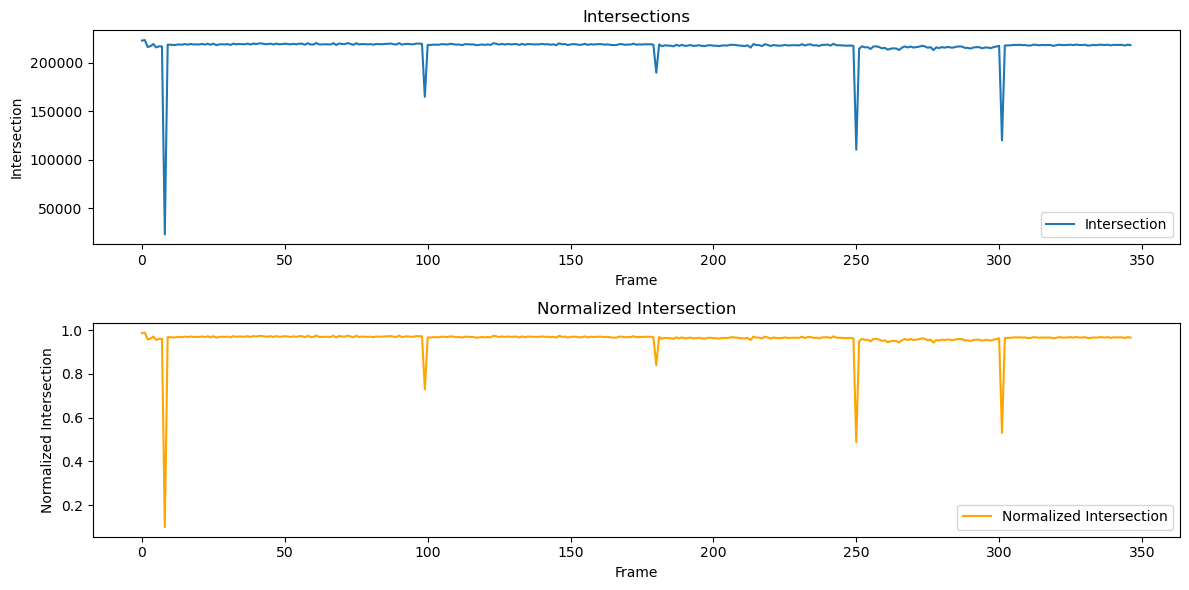

In [11]:
# PART B: Plot the intersection values in two separate figures
plt.figure(figsize=(12, 6))

# Plot raw intersections
plt.subplot(2, 1, 1)
plt.plot(intersections, label="Intersection")
plt.title("Intersections")
plt.xlabel("Frame")
plt.ylabel("Intersection")
plt.legend()

# Plot normalized intersections
plt.subplot(2, 1, 2)
plt.plot(normalized_intersections, label="Normalized Intersection", color="orange")
plt.title("Normalized Intersection")
plt.xlabel("Frame")
plt.ylabel("Normalized Intersection")
plt.legend()

plt.tight_layout()
plt.show()